In [21]:
import os
import pandas as pd
from mtgsdk import Card


In [9]:
files = os.listdir('./Data')
df = pd.DataFrame()

for file in files: 
    df = pd.concat([pd.read_csv('./Data/' + file), df])
    
df['dates'] = pd.to_datetime(df['dates'], format="%d.%m.%Y")

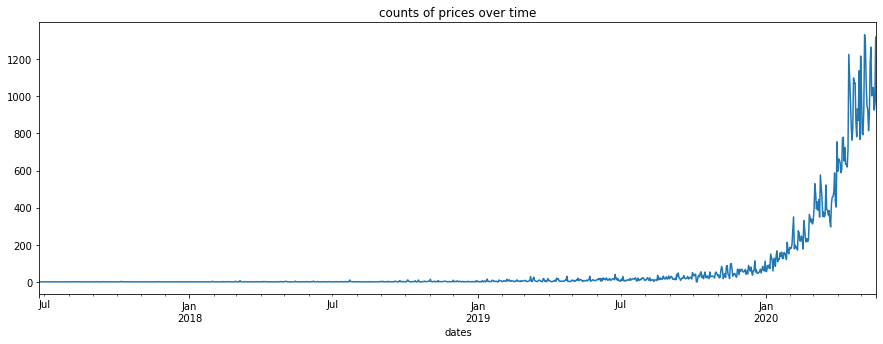

In [12]:
df.set_index('dates').resample('D')['prices'].count().plot(figsize=(15,5), title='counts of prices over time');

In [14]:
df[df['dates'] <= '2019-01-01'].shape[0] # Only 320 values before jan 2019

320

In [19]:
df[df['dates'] <= '2020-01-01'].shape[0] / df.shape[0] # 1/10 of the values are before jan 2020 

0.09903100775193799

In [20]:
df.groupby('card')['prices'].std().describe() # 1776 total cards and their std of price 

count    1776.000000
mean        0.368994
std         0.518592
min         0.029007
25%         0.120452
50%         0.190658
75%         0.382974
max         6.444471
Name: prices, dtype: float64

In [24]:
df

,dates,prices,card,expansion
0,2020-03-26,1.64,Acorn-Catapult,Commander
1,2020-03-28,1.00,Acorn-Catapult,Commander
2,2020-04-01,0.47,Acorn-Catapult,Commander
3,2020-04-08,1.49,Acorn-Catapult,Commander
4,2020-04-14,1.00,Acorn-Catapult,Commander
...,...,...,...,...
1195,2020-04-18,22.97,Loyal-Retainers,Commanders-Arsenal
1196,2020-04-28,22.99,Loyal-Retainers,Commanders-Arsenal
1197,2020-04-29,22.99,Loyal-Retainers,Commanders-Arsenal
1198,2020-05-06,23.99,Loyal-Retainers,Commanders-Arsenal


In [34]:
card_names = df['card'].apply(lambda x: x.replace('-', ' ')).unique()

In [ ]:
%%time 

card_obj_vals100 = [Card.where(name=name).all() for name in card_names[:100]]